**Gordon Doore Ghailan Fadah**

Fall 2023

CS343: Neural Networks

Project 3: Convolutional Neural Networks

In [3]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt

plt.show()
plt.style.use(['seaborn-v0_8-colorblind', 'seaborn-v0_8-darkgrid'])
plt.rcParams.update({'font.size': 20})

np.set_printoptions(suppress=True, precision=7)

# Automatically reload your external source code
%load_ext autoreload
%autoreload 2

## Goal

**Make sure any debug printouts do not appear if `verbose=False`!**

This week, you will test your CNN on the STL-10 dataset! The last step before you can do this is implementing an optimizer to update your network weights during gradient descent. You will implement a few and compare them.

## Task 5: Implement weight optimizers for gradient descent

To change the weights during training, we need an optimization algorithm to have our loss decrease over epochs as we learn the structure of the input patterns. Until now, we used **Stochastic gradient descent (SGD)**, which is the simplest algorithm. You will implement 3 popular algorithms:

- `SGD` (stochastic gradient descent)
- `SGD_Momentum` (stochastic gradient descent with momentum)
- `Adam` (Adaptive Moment Estimation)

Implement each of these according to the update equations (the `update_weights()` in each subclass in `optimizer.py`). Let's use $w_t$ in the math below to represent the weights in a layer at time step $t$, $dw$ to represent the gradient of the weights in a layer, and $\eta$ represent the learning rate. We use vectorized notation below (update applies to all weights element-wise). Then:

**SGD**: 

$w_{t} = w_{t-1} - \eta \times dw$

**SGD (momentum)**:

$v_{t} = m \times v_{t-1} - \eta \times dw$

$w_{t} = w_{t-1} + v_t$

where $v_t$ is called the `velocity` at time $t$. At the first time step (0), velocity should be set to all zeros and have the same shape as $w$. $m$ is a constant that determines how much of the gradient obtained on the previous time step should factor into the weight update for the current time step.


**Adam**:

$v_{t} = \beta_1 \times v_{t-1} + (1 - \beta_1)\times dw$

$p_{t} = \beta_2 \times p_{t-1} + (1 - \beta_2)\times dw^2$

$vc = v_{t} / \left (1-(\beta_1^t) \right )$

$pc = p_{t} / \left (1-(\beta_2^t) \right )$

$w_{t} = w_{t-1} - \left ( \eta \times vc \right ) / \left ( \sqrt(pc) + \epsilon \right ) $


Like SGD (momentum), Adam records momentum terms $v$ and $p$. At time step 0, you should initialize them to zeros in an array equal in size to the weights. $vc$ and $pc$ are variables computed on each time step. The remaining quantities are constants. Note that $t$ keeps track of the integer time step, and needs to be incremented on each update. 

In [8]:
from optimizer import *

####  Test SGD

In [3]:
np.random.seed(0)

wts = np.arange(-3, 3, dtype=np.float64)
d_wts = np.random.randn(len(wts))

optimizer = SGD()
optimizer.prepare(wts, d_wts)

new_wts_1 = optimizer.update_weights(verbose = True)
new_wts_2 = optimizer.update_weights()

print(f'SGD: Wts after 1 iter {new_wts_1}')
print(f'SGD: Wts after 2 iter {new_wts_2}')

SGD: Wts after 1 iter [-3.0017641 -2.0004002 -1.0009787 -0.0022409  0.9981324  2.0009773]
SGD: Wts after 2 iter [-3.0035281 -2.0008003 -1.0019575 -0.0044818  0.9962649  2.0019546]


Output should be:

    SGD: Wts after 1 iter [-3.1764052 -2.0400157 -1.0978738 -0.2240893  0.8132442  2.0977278]
    SGD: Wts after 2 iter [-3.3528105 -2.0800314 -1.1957476 -0.4481786  0.6264884  2.1954556]

####  Test SGD_Momentum

In [4]:
np.random.seed(0)

wts = np.random.randn(3, 4)
d_wts = np.random.randn(3, 4)

optimizer = SGD_Momentum(lr=0.1, m=0.6)
optimizer.prepare(wts, d_wts)

new_wts_1 = optimizer.update_weights()
new_wts_2 = optimizer.update_weights()

print(f'SGD M: Wts after 1 iter\n{new_wts_1}')
print(f'SGD M: Wts after 2 iter\n{new_wts_2}')

SGD M: Wts after 1 iter
[[ 1.6879486  0.3879897  0.9343517  2.2075258]
 [ 1.7181501 -0.9567621  0.9187816 -0.0659476]
 [ 0.1520801  0.3452366  0.0576     1.52849  ]]
SGD M: Wts after 2 iter
[[ 1.5661825  0.3685217  0.8633335  2.1541379]
 [ 1.4790974 -0.9239367  0.8686908  0.0707077]
 [ 0.5605585  0.2406577 -0.0807098  1.6472364]]


Output should be:

    SGD M: Wts after 1 iter
    [[ 1.6879486  0.3879897  0.9343517  2.2075258]
     [ 1.7181501 -0.9567621  0.9187816 -0.0659476]
     [ 0.1520801  0.3452366  0.0576     1.52849  ]]
    SGD M: Wts after 2 iter
    [[ 1.5661825  0.3685217  0.8633335  2.1541379]
     [ 1.4790974 -0.9239367  0.8686908  0.0707077]
     [ 0.5605585  0.2406577 -0.0807098  1.6472364]]

####  Test Adam

In [5]:
np.random.seed(0)

wts = np.random.randn(3, 4)
d_wts = np.random.randn(3, 4)

optimizer = Adam(lr=0.1)
optimizer.prepare(wts, d_wts)

new_wts_1 = optimizer.update_weights()
new_wts_2 = optimizer.update_weights()
new_wts_3 = optimizer.update_weights()

print(f'Adam: Wts after 1 iter\n{new_wts_1}')
print(f'Adam: Wts after 2 iter\n{new_wts_2}')
print(f'Adam: Wts after 3 iter\n{new_wts_3}')

Adam: Wts after 1 iter
[[ 1.6640523  0.3001572  0.878738   2.1408932]
 [ 1.767558  -0.8772779  0.8500884 -0.0513572]
 [-0.0032189  0.3105985  0.0440436  1.5542735]]
Adam: Wts after 2 iter
[[ 1.5640523  0.2001572  0.778738   2.0408932]
 [ 1.667558  -0.7772779  0.7500884  0.0486428]
 [ 0.0967811  0.2105985 -0.0559564  1.6542735]]
Adam: Wts after 3 iter
[[ 1.4640523  0.1001572  0.678738   1.9408932]
 [ 1.567558  -0.6772779  0.6500884  0.1486428]
 [ 0.1967811  0.1105985 -0.1559564  1.7542735]]


Output should be:

    Adam: Wts after 1 iter
    [[ 1.6640523  0.3001572  0.878738   2.1408932]
     [ 1.767558  -0.8772779  0.8500884 -0.0513572]
     [-0.0032189  0.3105985  0.0440436  1.5542735]]
    Adam: Wts after 2 iter
    [[ 1.5640523  0.2001572  0.778738   2.0408932]
     [ 1.667558  -0.7772779  0.7500884  0.0486428]
     [ 0.0967811  0.2105985 -0.0559564  1.6542735]]
    Adam: Wts after 3 iter
    [[ 1.4640523  0.1001572  0.678738   1.9408932]
     [ 1.567558  -0.6772779  0.6500884  0.1486428]
     [ 0.1967811  0.1105985 -0.1559564  1.7542735]]  

## Task 6: Write network training methods

Implement methods in `network.py` to actually train the network, using all the building blocks that you have created. The methods to implement are:

- `predict`
- `fit`

## Task 7: Overfitting a convolutional neural network

Usually we try to prevent overfitting, but we can use it as a valuable debugging tool to test out a complex backprop-based neural network. Assuming everything is working, it is almost always the case that we should be able to overfit a tiny dataset with a huge model with tons of parameters (i.e. your CNN). You will use this strategy to verify that your network is working.

Let's use a small amount of real data from STL-10 to perform the overfitting test.

### 7a. Move `load_stl10_dataset` and `preprocess_data.py` from the MLP project

Make the one following change in `preprocess_data.py`:

- In `preprocess_stl`, Re-arrange dimensions of `imgs` so that when it is returned, `shape=(Num imgs, RGB color chans, height, width)` (No longer flatten non-batch dimensions)
- In `load_stl10`, add an optional parameter to the function `scale_fact=3`, which specifies the factor by which to downscale the STL-10 images. The default (`scale_fact=3`) reduces the resolution from 96x96 to 32x32. Achieve this downscaling by passing along the optional parameter value when the `load` function in `load_stl10_dataset.py`.

In [6]:
import load_stl10_dataset
import preprocess_data
from network import ConvNet4
import optimizer

### 7b. Load in STL-10 at 16x16 resolution

If you don't want to wait for STL-10 to download from the internet and resize, copy over your data and numpy folders from your MLP project.

**Note:** The different train/test split here won't work if you hard coded the proportions in your `create_splits` implementation! *This isn't catastrophic, it just means that it will take longer to compute accuracy on the validation set.*

In [7]:
# Download the STL-10 dataset from the internet, convert it to Numpy ndarray, resize to 16x16
# cache it locally on your computer for faster loading next time.
load_stl10_dataset.purge_cached_dataset()
# preprocess and create splits
x_train, y_train, x_test, y_test, x_val, y_val, x_dev, y_dev = preprocess_data.load_stl10(
    n_train_samps=4578, n_test_samps=400, n_valid_samps=2, n_dev_samps=20, scale_fact=6)

print ('Train data shape: ', x_train.shape)
print ('Train labels shape: ', y_train.shape)
print ('Test data shape: ', x_test.shape)
print ('Test labels shape: ', y_test.shape)
print ('Validation data shape: ', x_val.shape)
print ('Validation labels shape: ', y_val.shape)
print ('dev data shape: ', x_dev.shape)
print ('dev labels shape: ', y_dev.shape)

Images are: (5000, 96, 96, 3)
Labels are: (5000,)
Resizing 5000 images to 16x16...

Done!
Saving Numpy arrays the images and labels to ./numpy...Done!
Train data shape:  (4578, 3, 16, 16)
Train labels shape:  (4578,)
Test data shape:  (400, 3, 16, 16)
Test labels shape:  (400,)
Validation data shape:  (2, 3, 16, 16)
Validation labels shape:  (2,)
dev data shape:  (20, 3, 16, 16)
dev labels shape:  (20,)


### 7c. Train and overfit the network on a small STL-10 sample with each optimizer

#### Goal

If your network works, you should see a drop in loss over epochs to 0 from the initial value of ~2.3.

#### Todo

In 3 seperate cells below

- Create 3 different `ConvNet4` networks.
- Compile each with a different optimizer (i.e. each net uses a different optimizer).
- Train each on the **dev** set and validate on the tiny validation set (we don't care about out-of-training-set performance here).

You will be making plots demonstrating the overfitting for each optimizer below. **You should train the nets with the same number of epochs such that at least 2/3 of them clearly show loss convergence to a small value; one optimizer may not converge yet, and that's ok**. Cut off the simulations based on the 2/3 that do converge.

#### Guidelines

- Weight scales and learning rates of `1e-2` should work well.
- Start by testing the Adam optimizer.
- Remember that the input shape is (3, 16, 16). You need to specify this to the network constructor.
- The hyperparameters are up to you, though I wouldn't recommend a batch size that is too small (close to 1), otherwise it may be tricky to see whether the loss is actually decreasing on average.
- Decreasing `acc_freq` will make the `fit` function evaluate the training and validation accuracy more often. This is a computationally intensive process, so small values come with an increase in training time. On the other hand, checking the accuracy too infrequently means you won't know whether the network is trending toward overfitting the training data, which is what you're checking for.
- Each training session takes ~15 mins on my laptop.

#### Caveat emptor

Training convolutional networks is notoriously computationally intensive. If you experiment with hyperparameters, each training session may take several hours.

- Use the loss/accuracy print outs to quickly gauge whether your hyperparameter choices are getting your network to decrease in loss.
- Monitor print outs and interrupt the Jupyter kernel if things are not trending in the right direction.

In [8]:
# Adam
adam_ConvNet4 = ConvNet4(input_shape = (3,16,16), wt_scale = 1e-2)
adam_ConvNet4.compile('adam')
adam_ConvNet4.fit(x_dev, y_dev, x_val, y_val,acc_freq=10, print_every=10, mini_batch_sz = 20, n_epochs = 80)


time for 0th iteration: 3.1229889392852783 seconds
projected time to finish: 4.163985252380371 minutes
iterations number: 0 ------- loss:  2.2551810918127875
train accuracy:  0.15
validation accuracy:  0.0
iterations number: 10 ------- loss:  1.5812166380009143
train accuracy:  0.6
validation accuracy:  0.0
iterations number: 20 ------- loss:  0.5567092529796582
train accuracy:  0.8
validation accuracy:  1.0
iterations number: 30 ------- loss:  0.24704809677065356
train accuracy:  0.7
validation accuracy:  0.0
iterations number: 40 ------- loss:  0.21262154345764728
train accuracy:  0.85
validation accuracy:  0.5
iterations number: 50 ------- loss:  0.09122181566845441
train accuracy:  1.0
validation accuracy:  1.0
iterations number: 60 ------- loss:  0.03102221316655305
train accuracy:  1.0
validation accuracy:  0.5
iterations number: 70 ------- loss:  0.005186026426208895
train accuracy:  1.0
validation accuracy:  0.5
final loss:  0.003994653193313466
final train accuracy  1.0


In [9]:
# SGD-M
sgdm_ConvNet4 = ConvNet4(input_shape = (3,16,16), wt_scale = 1e-2)
sgdm_ConvNet4.compile('sgd_m', )
sgdm_ConvNet4.fit(x_dev, y_dev, x_val, y_val,acc_freq=10, print_every=10, mini_batch_sz = 20, n_epochs = 80)

time for 0th iteration: 3.2648231983184814 seconds
projected time to finish: 4.353097597757976 minutes
iterations number: 0 ------- loss:  2.6824520202891122
train accuracy:  0.15
validation accuracy:  0.5
iterations number: 10 ------- loss:  1.9241967759479441
train accuracy:  0.35
validation accuracy:  0.5
iterations number: 20 ------- loss:  1.2727854271032637
train accuracy:  0.6
validation accuracy:  0.5
iterations number: 30 ------- loss:  0.4497527082401546
train accuracy:  0.85
validation accuracy:  0.5
iterations number: 40 ------- loss:  1.3479042025623638
train accuracy:  0.4
validation accuracy:  0.5
iterations number: 50 ------- loss:  3.465092493729575
train accuracy:  0.45
validation accuracy:  0.5
iterations number: 60 ------- loss:  0.842095905421666
train accuracy:  0.65
validation accuracy:  0.5
iterations number: 70 ------- loss:  0.28540394120936513
train accuracy:  0.8
validation accuracy:  0.5
final loss:  0.06795325880145905
final train accuracy  0.95


In [10]:
# SGD
sgd_ConvNet4 = ConvNet4(input_shape = (3,16,16), wt_scale = 1e-2)
sgd_ConvNet4.compile('sgd')
sgd_ConvNet4.fit(x_dev, y_dev, x_val, y_val,acc_freq=10, print_every=10, mini_batch_sz = 20, n_epochs = 80)

time for 0th iteration: 3.5578701496124268 seconds
projected time to finish: 4.743826866149902 minutes
iterations number: 0 ------- loss:  2.1154068318888686
train accuracy:  0.1
validation accuracy:  0.0
iterations number: 10 ------- loss:  1.844932071867552
train accuracy:  0.4
validation accuracy:  0.5
iterations number: 20 ------- loss:  1.609459044926033
train accuracy:  0.35
validation accuracy:  0.5
iterations number: 30 ------- loss:  1.747670390880523
train accuracy:  0.35
validation accuracy:  0.5
iterations number: 40 ------- loss:  1.4324839179049589
train accuracy:  0.45
validation accuracy:  0.5
iterations number: 50 ------- loss:  1.5457673802066036
train accuracy:  0.6
validation accuracy:  0.5
iterations number: 60 ------- loss:  1.2119987788735511
train accuracy:  0.7
validation accuracy:  0.0
iterations number: 70 ------- loss:  1.1043992445404116
train accuracy:  0.55
validation accuracy:  0.5
final loss:  1.047453821705102
final train accuracy  0.8


### 7d. Evaluate and plot the different optimizer results

Make 2 "high quality" plots showing the following

- Plot the accuracy (y axis) for the three optimizers as a function of training epoch (x axis).
- Plot the loss (y axis) for the three optimizers as a function of training iteration (x axis).

A high quality plot consists of:
- A useful title
- X and Y axis labels
- A legend

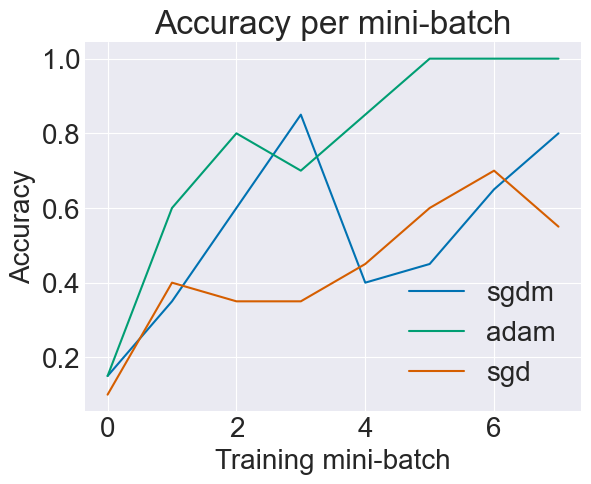

In [11]:
plt.plot(sgdm_ConvNet4.train_acc_history, label ="sgdm")
plt.plot(adam_ConvNet4.train_acc_history, label = "adam")
plt.plot(sgd_ConvNet4.train_acc_history, label = "sgd")
plt.xlabel('Training Epoch')
plt.ylabel('Accuracy')
plt.title("Accuracy per Epoch")
plt.legend()
plt.show()

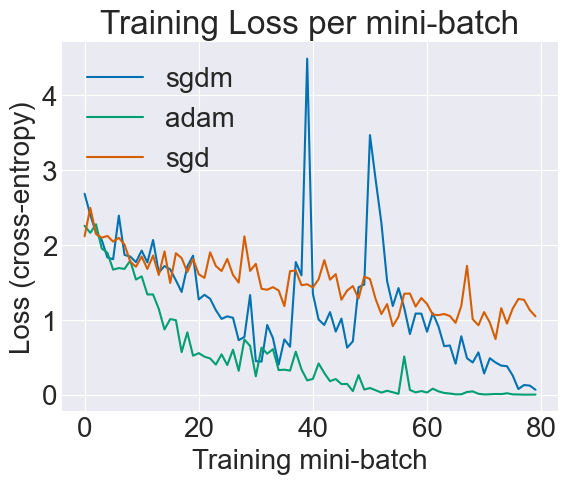

In [12]:
plt.plot(sgdm_ConvNet4.loss_history, label ="sgdm")
plt.plot(adam_ConvNet4.loss_history, label = "adam")
plt.plot(sgd_ConvNet4.loss_history, label = "sgd")
plt.xlabel('Training mini-batch')
plt.ylabel('Loss (cross-entropy)')
plt.title("Training Loss per mini-batch")
plt.legend()
plt.show()

### 7e. Questions

**Question 4**: Why does decreasing the mini-batch size make the loss print-outs more erratic in Task 7c?

**Question 5**: Which optimizer works best and why do think it is best?

**Question 6**: What is happening with the training set accuracy and why?

**Answer 4:** because we have a freq_acc parameter that control how much to print inside each iteration so if we decrease mini-batch size we increase how fast we go through each iteration, increasing the amount of prints-outs

**Answer 5:** Adam works best because it is sorta dynamic where it can determine how fast it should go based on the previous losses. It's a better version of SGD-M in this way.

**Answer 6:** The network's performance on the training accuracy trains all the way to 100% (or nearly).  This is due to overtraining.  We see perfect accuracy because the network has enough trainable parameters that with enough time, it can literally fit parameters to each input, so that it get's the output correct each time.

## Task 8: Training your convolutional neural network on STL-10

### 8a. Load in STL-10 at 32x32 resolution

In [13]:
# Download the STL-10 dataset from the internet, convert it to Numpy ndarray, resize to 16x16
# cache it locally on your computer for faster loading next time.
load_stl10_dataset.purge_cached_dataset()
# preprocess and create splits
x_train, y_train, x_test, y_test, x_val, y_val, x_dev, y_dev = preprocess_data.load_stl10(
    n_train_samps=4398, n_test_samps=400, n_valid_samps=200, n_dev_samps=2, scale_fact=3)

print ('Train data shape: ', x_train.shape)
print ('Train labels shape: ', y_train.shape)
print ('Test data shape: ', x_test.shape)
print ('Test labels shape: ', y_test.shape)
print ('Validation data shape: ', x_val.shape)
print ('Validation labels shape: ', y_val.shape)
print ('dev data shape: ', x_dev.shape)
print ('dev labels shape: ', y_dev.shape)

Images are: (5000, 96, 96, 3)
Labels are: (5000,)
Resizing 5000 images to 32x32...Done!
Saving Numpy arrays the images and labels to ./numpy...Done!
Train data shape:  (4398, 3, 32, 32)
Train labels shape:  (4398,)
Test data shape:  (400, 3, 32, 32)
Test labels shape:  (400,)
Validation data shape:  (200, 3, 32, 32)
Validation labels shape:  (200,)
dev data shape:  (2, 3, 32, 32)
dev labels shape:  (2,)


### 8b. Set up accelerated convolution and max pooling layers

As you may have noticed, we had to downsize STL-10 to 16x16 resolution to train the network on the dev set (N=20) in a reasonable amount of time. The training set has N≅4000 samples, how will we ever manage to process that amount of data?!

On one hand, this is an unfortunate inevitable reality of working with large ("big") datasets: you can easily find a dataset that is too time consuming to process for any computer, despite how fast/many CPU/GPUs it has.

On the other hand, we can do better for this project and STL-10 :) If you were to time (profile) different parts of the training process, you'd notice that largest bottleneck is convolution and max pooling operations (both forward/backward). You implemented those operations intuitively, which does not always yield the best performance. **By swapping out forward/backward convolution and maxpooling for implementations that use different algorithms (im2col, reshaping) that are compiled to C code, we will speed up training up by several orders of magnitude**.

Follow these steps to subsitute in the "accelerated" convolution and max pooling layers.

- Install the `cython` python package: `pip3 install cython`.
- Dowload files `im2col_cython.pyx`, `accelerated_layer.py`, `setup.py` from the project website. Put them in your base project folder.
- Open terminal, `cd` to Project directory.
- Compile the im2col functions: `python3 setup.py build_ext --inplace`. A `.c` and `.so` file should have appeared in your project folder (*It is ok if it prints out a bunch of warnings. If it creates `.c` and `.so` files after a few seconds, you should be all set.*).
- Restart Jupyter Notebook kernel
- Create a class called `Conv4NetAccel` in `network.py` by copy-pasting the contents of `Conv4Net`. Import `accelerated_layer` at the top and replace the `Conv2D` and `MaxPooling2D` layers with `Conv2DAccel` and `MaxPooling2DAccel`.


#### Windows users

The above compile terminal command for Windows users is:

```bash
python setup.py build_ext --inplace
```

Before this can work though, you’ll need a C/C++ compiler installed on your system. To do this, download [Microsoft Build tools for Visual Studio 2019](https://visualstudio.microsoft.com/thank-you-downloading-visual-studio/?sku=BuildTools&rel=16). Click to download the installer. Run it and select the C++ compiler option. It might ask you to install other stuff, but that shouldn’t be necessary — just the C++ compiler. After it is installed, run the above python terminal command. It should end without error (last line should be “Finished generating code”). Warning printouts are fine.

### 8c. Training convolutional neural network on STL-10

You are now ready to train on the entire training set.

- Create a `Conv4NetAccel` object with hyperparameters of your choice.
- Your goal is to achieve at least 45% accuracy on the test and/or validation set.

#### Notes

- I suggest using your intuition about hyperparameters and over/underfitting to guide your choice, rather than a grid search. This should not be overly challenging.
- Use the best / most efficient optimizer based on your prior analysis.
- It should take on the order of 1 sec per training iteration. If that's way off, seek help as something could be wrong with running the acclerated code.

In [2]:
from network import ConvNet4Accel

In [59]:
stl10_accel = ConvNet4Accel(wt_scale = 2e-2, reg = 0.008)
stl10_accel.compile('adam', lr = 0.00025)
stl10_accel.fit(x_train, y_train, x_val, y_val,acc_freq=10, print_every=10, mini_batch_sz = 100, n_epochs = 10)

time for 0th iteration: 0.45945191383361816 seconds
projected time to finish: 3.2927387158075967 minutes
iterations number: 0 ------- loss:  9.202159139845788
train accuracy:  0.128
validation accuracy:  0.09
iterations number: 10 ------- loss:  4.410744764450943
train accuracy:  0.198
validation accuracy:  0.21
iterations number: 20 ------- loss:  3.382683648514689
train accuracy:  0.19
validation accuracy:  0.21
iterations number: 30 ------- loss:  3.185881161887234
train accuracy:  0.238
validation accuracy:  0.235
iterations number: 40 ------- loss:  3.075755305946241
train accuracy:  0.246
validation accuracy:  0.23
iterations number: 50 ------- loss:  2.8750835369197905
train accuracy:  0.31
validation accuracy:  0.255
iterations number: 60 ------- loss:  2.759210039855401
train accuracy:  0.35
validation accuracy:  0.28
iterations number: 70 ------- loss:  2.8147995486684794
train accuracy:  0.358
validation accuracy:  0.3
iterations number: 80 ------- loss:  2.6186831266904913


### 8d. Analysis of STL-10 training quality

Use your trained network that achieves 45%+ accuracy on the test set to make "high quality" plots showing the following 

- Plot the accuracy of the training and validation sets as a function of training epoch. You may have to convert iterations to epochs.
- Plot the loss as a function of training iteration.

In [60]:

print(stl10_accel.accuracy(x_test, y_test))

0.485


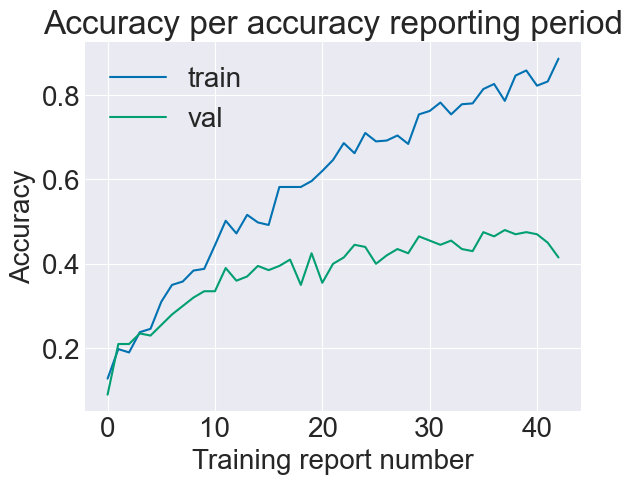

In [61]:
plt.plot(stl10_accel.train_acc_history, label ="train")
plt.plot(stl10_accel.validation_acc_history, label ="val")
plt.xlabel('Training report number')
plt.ylabel('Accuracy')
plt.title("Accuracy per accuracy reporting period")
plt.legend()
plt.show()

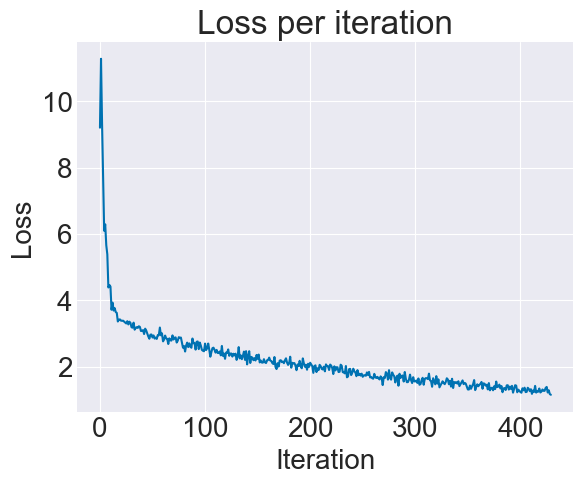

In [62]:
plt.plot(stl10_accel.loss_history)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title("Loss per iteration")
plt.show()

### 8e. Visualize layer weights

Run the following code and submit the inline image of the weight visualization of the 1st layer (convolutional layer) of the network.

**Note:**
- Setting optional parameter to `True` will let you save a .PNG file in your project folder of your weights. I'd suggest setting it to `False` unless look at your weights and they look like they are worth saving. You don't want a training run that produces undesirable weights to overwrite your good looking results!

In [63]:
def plot_weights(wts, saveFig=True, filename='convWts.png'):
    grid_sz = int(np.sqrt(len(wts)))
    plt.figure(figsize=(10,10))
    for x in range(grid_sz):
        for y in range(grid_sz):
            lin_ind = np.ravel_multi_index((x, y), dims=(grid_sz, grid_sz))
            plt.subplot(grid_sz, grid_sz, lin_ind+1)
            currImg = wts[lin_ind]
            low, high = np.min(currImg), np.max(currImg)
            currImg = 255*(currImg - low) / (high - low)
            currImg = currImg.astype('uint8')
            plt.imshow(currImg)
            plt.gca().axis('off')
    plt.subplots_adjust(wspace=0.01, hspace=0.01)
    if saveFig:
        plt.savefig(filename)
    plt.show()

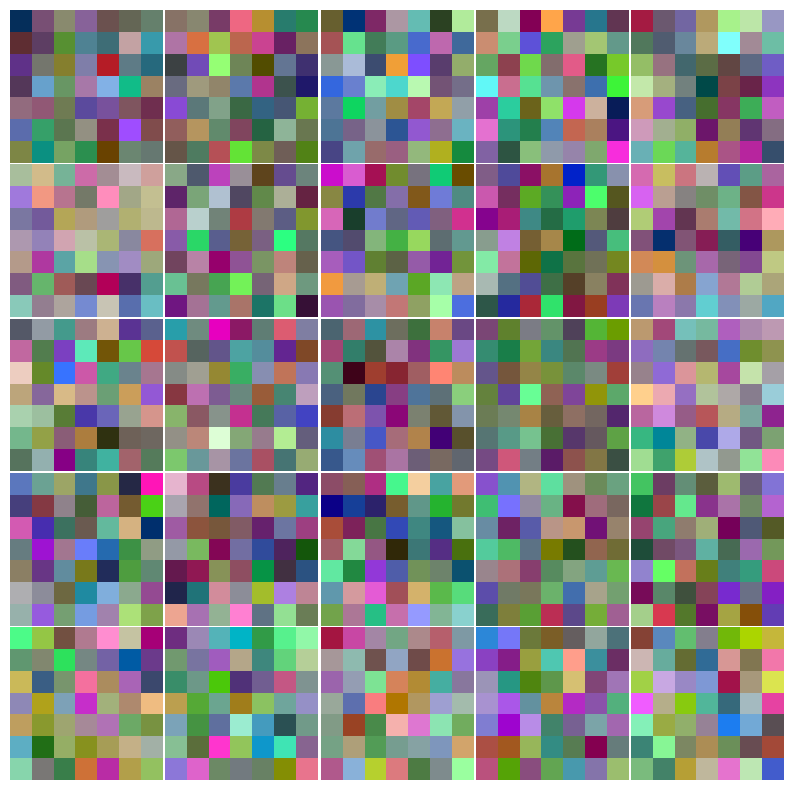

In [64]:
# Subsitute your trained network below
# netT is my network's name
# Every weight should not look like RGB noise
plot_weights(stl10_accel.layers[0].wts.transpose(0, 2, 3, 1), saveFig=True, filename='convWts_adam_train_20epoch.png')

### 8f. Questions

**Question 7:** What do the learned filters look like? Does this make sense to you / is this what you expected? In which area of the brain do these filters resemble cell receptive fields?

#### Note

You should not see RGB "noise". If you do, and you pass the "overfit" test with the Adam optimizer, you probably need to increase the number of training epochs.

**Answer 7:** 

The biggest difference to me between the visualized weights and RGB noise is that some weights are clearly darker than others. Additionally, there are some weights with a dominant color.  For example there is one here which is much more blue than the rest, there are also some that are very green. We see what originally looks very noisy, but can apply what we know about low level weights to interpret them. In the brain we would expect these filters to pick up edges and other low level features in data. I see many edges between different colors.  I also admit there is a real possibility that this is just noise and I'm interpreting it wrong.  I'm really not super sure.  I got over 50% accuracy in another training sesion but the weights seemed overtrained so I stopped training then, I did it this time and got pretty good accuracy (46.5%) and then I looked at performance on the test set which was even better (48.5% accuracy). This generalized fairly well despite the fact that I was clearly overfit on my trianing data (80+% accuracy on that.) Additionally, we can think about what RGB noise really is and understand that the brightness of these areas is actually a huge indicator.  Some of these kernels are lighter (RGB values closer to 1) and some of them are more dim (closer to 0).  This seems to one of the largest things that this is interpreting at the lowest level.  I tried using more regularization but the model simply wouldn't train. 

## Extensions

**General advice:** When making modifications for extensions, make small changes, then check to make sure you pass test code. Also, test out the network runtime on small examples before/after the changes. If you're not careful, the simulation time can become intractable really quickly!

**Remember:** One thorough extension usually is worth more than several "shallow" extensions.

### 0. Pedal to the metal: achieve high accuracy on STL-10

You can achieve higher (>50%) classification accuracy on the STL-10 test set. Find the hyperparameters to achieve this. You can use random or grid search — keep in mind that even with the accelerated layers, each training run will take at least minutes to complete.

### 1. Experiment with different network architectures.

The design of the `Network` class is modular. As long as you're careful about shapes, adding/removing network layers (e.g. `Conv2D`, `Dense`, etc.) should be straight forward. Experiment with adding another sequence of `Conv2D` and `MaxPooling2D` layers. Add another `Dense` hidden layer before the output layer. How do the changes affect classification accuracy and loss? 

### 2. Experiment with different network hyperparameters.

Explore the affect one or more change below has on classification. Be careful about how the hyperparameters may affect the shape of network layers. Thorough analysis will get you more points (not try a few ad hoc values).

- Experiment with different numbers of hidden units in the Dense layers.
- Experiment different max pooling window sizes and strides.
- Experiment with kernel sizes (not 7x7). Can you get away with smaller ones? Do they perform just as well? What is the change in runtime like? What is the impact on their visualized appearance?
- Experiment with number of kernels in the convolutional layer. Is more/fewer better? What is the impact on their visualized appearance?

### 3. Different hidden layer activation functions

Implement and experiment with activation functions that are appropriate for hidden layers (e.g. ELU, SELU, GELU, sigmoid, Softplus, Mish, etc.). How do they affect speed of training and accuracy? These activation functions can replace ReLU in Dense and Conv2D layers.

###  4. Add and test some training bells and whistles

Add features like early stopping, learning rate decay (learning rate at the end of an epoch becomes some fraction of its former value), etc and assess how they affect training loss convergence and accuracy. 

### 5. Additional optimizers

Research other optimizers used in backpropogation and implement one or more of them within the model structure. Compare its performance to ones you have implemented

### 6. Optimize your algorithms

Find the main performance bottlenecks in the network and improve your code to reduce runtime (e.g. reduce explicit for loops, increase vectorization, etc). Research faster algorithms to do operations like convolution and implement them. Given the complexity of the network, I suggest focusing on one area at a time and make sure everything you change passes the test code before proceeding. Quantify and discuss your performance improvements

### 7. Additional loss functions

Implement support for sigmoid, or another activation functions and associated losses. Test it out and compare with softmax/cross entropy. Make sure any necessary changes to the layer's gradient are made.

### 8. Additional datasets

Do classification and analyze the results with an image dataset of your choice (MNIST, Fashion MNIST, CIFAR10, etc.).

### 9. Performance analysis

Do a thorough comparative analysis of the non-accelerated network and accelerated networks with respect to runtime.

### 10. Visualize network predictions

Plot predicted class labels with a sample of test images to better assess where the network excels and where it struggles.

### 11. Confusion matrix

Make a confusion matrix and analyze the pattern of errors made by the network. For example, does the network confuse any two classes far more than others?

## Extension: Building a semantic segmentation model

#### A little bit of background on semantic segmentation:

Semantic segmentation is a problem which involves creating pixel-wise classifications within an image.  It is used to detect particular elements or objects within an image and has a multitude of uses.  It's useful for interpreting image data with repeated objects and shapes which may be either too complex or too numerous to interpret manually.  For example, one can use semantic segmentation to interpret a scene in a self-driving car, classifying road boundaries, pedestrians, other cars, etc...  One can also interpret GIS data and really any other image data that we want to classify portions of an image.

#### Let's think about what's different about semantic segmentation compared to the image classification that we are doing:

1. Data: with semantic segmentation, our X data is largely the same, just images of whatever we are interested in.  However, the labels will need to represent pixel-wise classifications.  These are called masks and they look like color-splotched versions of our input images. Here's what I mean: 

![](img_and_mask.png)

2. Network Architecture.  In order to build a semantic segmentation model, we need an output in the same shape as our input.  To do this, we use a type of decoding called transposed convolution or upconvolution (NOTE: deconvolution is different and involves making the exact same image rather than our interpretation).  We already know a lot about upconvolution due to taking the gradient of convolution. There's also a plethora of other layers which can be introduced: Batch normalization, Copy and concatenate are a couple that I wanted to implement but didn't have time to get working. In the future I'd love to sit down and figure all of that out.

3. Loss function/Final Layer compatibility.  With semantic segmentation we don't actually have to change too much about our loss function, especially since I decided to classify 3 classes (this means we can use Categorical Cross Entropy).  However, we do need to change how our data is resized.  Because the output of the final layer will be of size (N, 3, 16, 16) (Batch size, Num_classes, Imgy, imgx) we need to flatten across X and Y in our last layer.  Additionally, the last layer CAN be dense, but not the way that we have it implemented (at least as far as I can tell).  To deal with this, we choose to use Conv2D with a kernel size of 1.  This is essentially dense if we use num_ker = num_classes. Anyways, making these changes should make things work!

So let's get into how exactly this transposed convolution works.  We start with the input which will be a lower dimension matrix.  Let's call it a 2x2.  We want to expand the dimensionality of this matrix so we have to think a bit backwards compared to convolution.  We imagine our kernal sitting on top of our expected output which we initialize to a zero-matrix.  We then pick the top left pixel of our input and multiply our kernal (the weight associated with the given input).  The adding matrix will be a matrix of the same size as our kernal, we add this into the same relative permutation on our output as we chose on our input.  We then take a stride in whatever way that we have decided over our output image and then operate in this way on the top right part of our input, adding to the output (not resetting values).

Here's a visual representation of this:

![](notebook_imgs/t-conv.gif)

Continuing our discussion of network architecture.  We need to use this transposed convolution operation to expand dimensionality as we pass through layers, but we also need to understand the gradient of this:

Interestingly, since the gradient of convolution is upconvolution, the gradient of upconvolution is convolution.

We have already implemented this! 

Next, I intended to get Copy and Concatenate working, but I couldn't reconcile some of the key differences with copy and concatenate with the structuer of the Layer class.  Most significantly, Copy and Concatenate copies the information of the activation of a previous layer with the same shape and concatenates it to the input to the layer. This means that we will have to pass another thing into the layer.  Passing this with the forward function does not line up with the inherited methods from the Layer class. I thought that it would work to have this saved as an instance variable to be defined in the layer, but I didn't get to working through this.

Anyway, let's think a bit about what's going on.  The Copy and Concatenate layer is designed to help decode the information of the network.  When we encode, the information propagated is only a part of the whole picture.  In order to contextualize it to each input (pixel here since we are segmenting), we need propagate information from previous layers.  This is exactly what we can do when we concatenate the net_act of a previous layer after we upsample using upconvolution. 

This is all fairly new to me so I'm still learning, but I think I get what's going on at a highish level.

So let's figure out our data and an architecture. 

### Architecture, Continued

We are going to train this network on our cpu so we need to be VERY mindful of our network and data's complexity. We choose to use 16x16 single channel images and we are going to try and semantically segment 2 classes, object and background.  We will try to make a mini-unet. This network has many layers, but since we are keeping our data fairly small, we feel ok about this. 

The input will have shape: (16,16,1) and will then be convolved twice with 8 kernals, producing an output of shape (16,16,8).  This is the top of our U. Next, we go down in image complexity using a  max-pooling layer that is 2x2.  So we are downsampling across the image dimension giving shape (8,8,1).  We then, we do this double convolution again with double the kernals (16 now).  This produces a shape of (8,8,16). 

We now want to decode.  

This is actually fairly simple.  We do everything the same, except now we want to do transposed convolutions instead of maxpooling.  The resolution of our upconvolution should be the same as our max-pooling so the dimension will match the end of the previous layer.  We now do something crazy, we concatenate the output of the previous layer into the upsampled value.  This allows us to recover the lost information as we downsampled.

We can now convolve as normal into this value.  We have the option here to do dropout or batch normalization, but that would mean I would have to implement those things including the gradient of batch normalization and I don't want to do that.  The same convolution and ReLU we had before should be sufficient. 

From here, we are back at our original image size. 

So, here is an image of this architecture: 

I drew this by quickly putting the layers into keras sequential and using the plot_model function.


![](notebook_imgs/encode-decode.png)

Here, the network is simplified to input, encode, decode, output.  However, we can look at a more in-depth image of our network below.  I drew this one myself on figma.

I would love to know what a more standard place to draw networks out is?

![](notebook_imgs/network_ext.png)


### So let's get to implementing this model. I am going to make a new class within our network file

We want to first get our data sorted out.

Let's use MNIST, and add noise to our inputs.



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import cv2

2023-11-24 08:58:29.331874: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


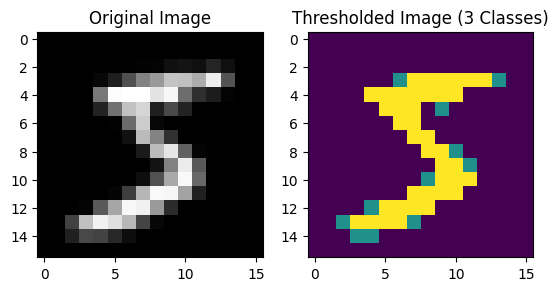

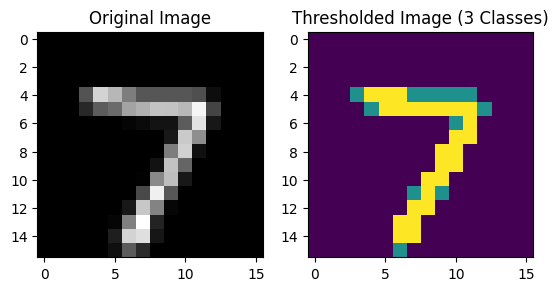

In [ ]:
# Load MNIST dataset
(x_train, _), (x_test, _) = keras.datasets.mnist.load_data()

# get values for threshold: https://datacarpentry.org/image-processing/07-thresholding.html (ideas on how to do thresholding here)
threshold_dark = 65  # Pixels below this value will be classified as really dark
threshold_kinda_dark = 100  # Pixels between this and threshold_dark will be classified as kinda dark

#  thresh function
def apply_multiclass_threshold(image, threshold_dark, threshold_kinda_dark):
    result = np.zeros_like(image, dtype=np.uint8)
    result[image < threshold_dark] = 1  # really dark
    result[(image >= threshold_dark) & (image < threshold_kinda_dark)] = 2  # kinda dark
    result[image >= threshold_kinda_dark] = 3  # background
    return result

# resizing data faster
def resize_images(images, new_size=(16, 16)):
    resized_images = []
    for img in images:
        resized_img = cv2.resize(img, new_size, interpolation=cv2.INTER_AREA)
        resized_images.append(resized_img)
    return np.array(resized_images)

# resize data to 16x16 since it comes in 24x24
x_train_resized = resize_images(x_train)
x_test_resized = resize_images(x_test)

# add singleton dimension in channel slot (do I need to even do this?)
x_train = x_train_resized[:, np.newaxis, :, :]
x_test = x_test_resized[:, np.newaxis, :, :]

# threshold
y_train = np.array([apply_multiclass_threshold(image, threshold_dark, threshold_kinda_dark) for image in x_train_resized])
y_test = np.array([apply_multiclass_threshold(image, threshold_dark, threshold_kinda_dark) for image in x_test_resized])

# Let's look at our images
index = 0
plt.subplot(1, 2, 1)
plt.imshow(x_train_resized[index], cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(y_train[index], cmap='viridis') #apologies if this is not colorblind friendly I don't remember
plt.title('Thresholded Image (3 Classes)')

plt.show()

plt.subplot(1, 2, 1)
plt.imshow(x_test_resized[index], cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(y_test[index], cmap='viridis') 
plt.title('Thresholded Image (3 Classes)')

plt.show()

y_train = y_train-1
y_test = y_test-1


In [ ]:
#We make network object and then try to train
from network import EncoderDecoderSmall

segmenter = EncoderDecoderSmall()
segmenter.compile(optimizer_name='adam')
segmenter.fit(x_train[:-200], y_train[:-200], x_train[-200:], y_train[-200:])


layer: Conv
batch_sz=100, n_chan=1, img_x=16, img_y=16
n_kers=16, n_ker_chans=1, ker_x=3, ker_y=3
f_Img shape;  (100, 16, 16, 16)
img shape: (100, 1, 16, 16)
padding:  1
padded_image shape: (100, 1, 18, 18)
layer: Conv
batch_sz=100, n_chan=16, img_x=16, img_y=16
n_kers=16, n_ker_chans=16, ker_x=3, ker_y=3
f_Img shape;  (100, 16, 16, 16)
img shape: (100, 16, 16, 16)
padding:  1
padded_image shape: (100, 16, 18, 18)
layer: Pool
layer: Conv
batch_sz=100, n_chan=16, img_x=8, img_y=8
n_kers=32, n_ker_chans=16, ker_x=3, ker_y=3
f_Img shape;  (100, 32, 8, 8)
img shape: (100, 16, 8, 8)
padding:  1
padded_image shape: (100, 16, 10, 10)
layer: Conv
batch_sz=100, n_chan=32, img_x=8, img_y=8
n_kers=32, n_ker_chans=32, ker_x=3, ker_y=3
f_Img shape;  (100, 32, 8, 8)
img shape: (100, 32, 8, 8)
padding:  1
padded_image shape: (100, 32, 10, 10)
layer: UpConv
conv2nn_transpose:
batch_sz=100, n_chan=32, img_x=8, img_y=8
n_kers=32, n_ker_chans=32, ker_sz=2
(100, 32, 16, 16)
layer: Conv
batch_sz=100, n_cha

ValueError: operands could not be broadcast together with shapes (100,3) (100,3,16,16) 

I can't quite get this working, but am really happy with what I learned and the attempt.  I implemented multiple new layers, I learned about CopyAndConcat, and a bit more about how to implement decoding.

Overall, this is a pretty hard thing to implement by hand, and I made really good progress towards that. 

I have a feeling the following things could be wrong:

1. The gradient for CopyAndConcat: I think this because I came up with it intuitively and I'm not sure I was right.  I though that since we are concatenating the results from layer 3, the gradient would just be splitting the array and taking the one associated with the downstream layer.

2. The entire gradient of UpConvolution.  I thought that since the operation is identical to convolution, but my implementation is still likely a bit off.  I actually haven't even made it far enough to check.  

3. There's something wrong with my loss function. I originally planned on doing binary classification, but I didn't want to implement sigmoid everywhere. I am doing multiple classes so CE makes sense to me, but I'm getting a shape mismatch here since this is still set up for a single label per image.  I think I could get this to work with another few days.

I decided just to take the copy and concat out.  This, according to what I've read, means that we are not taking the lower level convolutions of the earlier layer which seems to be an essential part of decoding. 

The forward pass is working otherwise. 

I will not continue debugging my backward pass because It's just not done and I have already put many hours into this project (12+ in extension). 


In [10]:
def confusion_matrix(y, y_pred):
        un_arr = np.unique(y)
        r = un_arr.shape[0]

        
        y_pred = np.array(y_pred, dtype=int)
        y = np.array(y, dtype=int)
        m = [[0] * r for i in range(r)]
        for pred, exp in zip(y_pred, y):
            m[pred][exp] += 1
        return m

from tensorflow import keras
(x_train_F, y_train_F), (x_test_F, y_test_F) = keras.datasets.fashion_mnist.load_data()


# get smaller dataset
x_train_F = x_train_F[0:5000, :, :]
y_train_F = y_train_F[0:5000]
x_val_F = x_train_F[5000:5200, :, :]
y_val_F = y_train_F[5000:5200]
x_test_F = x_test_F[0:400, :, :]
y_test_F = y_test_F[0:400]
print(x_train_F.shape, x_test_F.shape, y_test_F.shape, y_train_F.shape)

#train our model

Fmnist_accel = ConvNet4Accel(wt_scale = 2e-2, reg = 0.008, input_shape=(1,28,28))
Fmnist_accel.compile('adam', lr = 0.00025)
Fmnist_accel.fit(x_train_F, y_train_F, x_val_F, y_val_F,acc_freq=10, print_every=10, mini_batch_sz = 100, n_epochs = 10)

(5000, 28, 28) (400, 28, 28) (400,) (5000,)


ValueError: not enough values to unpack (expected 4, got 3)

For some reason the model is running into an input shape error and I'm not really sure how to solve it. It seems to be expecting 4 values for the input shape but I know it should be 3 and when I Put in a 4th one it says it expects 3. However, I have wrote the confusion matrix and prepared the FMNIST daataset which would be ran through the model and than analysed for errors.